In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

In [ ]:
# Define transformations for the train, validation, and test sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
import os

In [ ]:
data_dir = '/content/drive/MyDrive/Dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=2)
               for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes

In [ ]:
class_names

['MD', 'PD', 'WD']

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load a pretrained ResNet-50 model and modify the final layer
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # Assuming 3 classes: WD, MD, PD
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 103MB/s]


In [ ]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 25

In [14]:
# Train the model
for epoch in range(num_epochs):  # loop over the dataset multiple times
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(dataloaders["train"])}')

    # Validate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the validation images: {100 * correct / total}%')

print('Finished Training')

Epoch 1, Loss: 1.10447648829884
Accuracy of the network on the validation images: 45.833333333333336%
Epoch 2, Loss: 0.7716284135977427
Accuracy of the network on the validation images: 66.66666666666667%
Epoch 3, Loss: 0.7609919044706557
Accuracy of the network on the validation images: 50.0%
Epoch 4, Loss: 0.7296815254622036
Accuracy of the network on the validation images: 79.16666666666667%
Epoch 5, Loss: 0.7802782192826271
Accuracy of the network on the validation images: 58.333333333333336%
Epoch 6, Loss: 0.8354363594618108
Accuracy of the network on the validation images: 79.16666666666667%
Epoch 7, Loss: 0.9898637564645874
Accuracy of the network on the validation images: 83.33333333333333%
Epoch 8, Loss: 0.8071153731809722
Accuracy of the network on the validation images: 75.0%
Epoch 9, Loss: 0.7801493907140361
Accuracy of the network on the validation images: 75.0%
Epoch 10, Loss: 0.890228678782781
Accuracy of the network on the validation images: 70.83333333333333%
Epoch 11,

Accuracy of the model on the test images: 56.52173913043478%


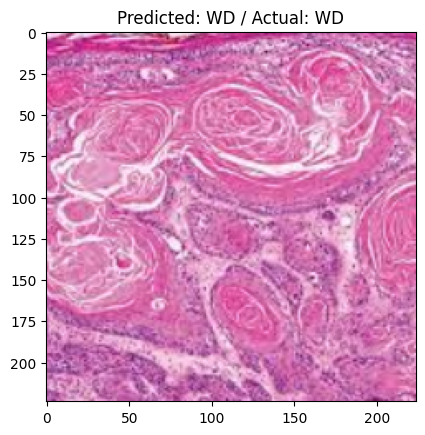

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Calculate test accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total}%')

# Predict and display a random test image
model.eval()
inputs, labels = next(iter(dataloaders['test']))
inputs = inputs.to(device)
labels = labels.to(device)
outputs = model(inputs)
_, preds = torch.max(outputs, 1)



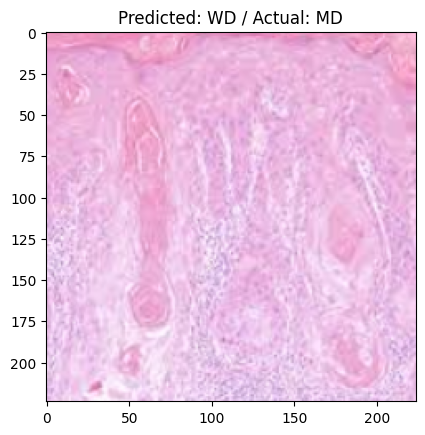

In [16]:
# Choose a random test image
idx = np.random.randint(len(inputs))
imshow(inputs.cpu().data[idx], title=f'Predicted: {class_names[preds[idx]]} / Actual: {class_names[labels[idx]]}')


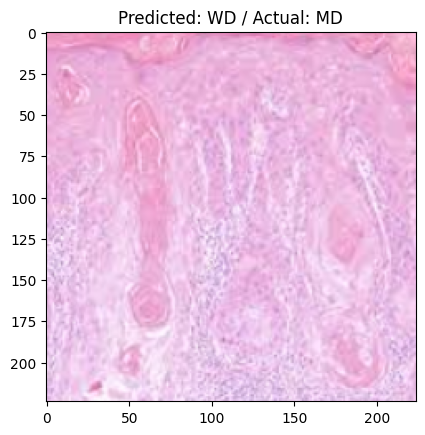

In [17]:
# Choose a random test image
idx = np.random.randint(len(inputs))
imshow(inputs.cpu().data[idx], title=f'Predicted: {class_names[preds[idx]]} / Actual: {class_names[labels[idx]]}')


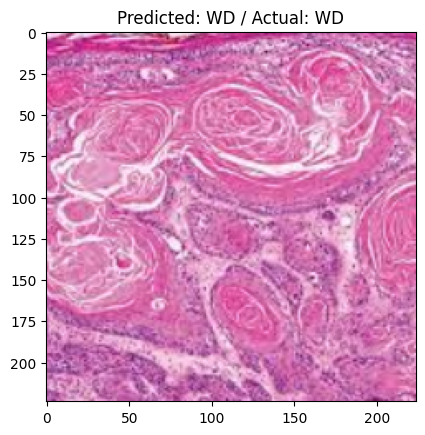

In [18]:
# Choose a random test image
idx = np.random.randint(len(inputs))
imshow(inputs.cpu().data[idx], title=f'Predicted: {class_names[preds[idx]]} / Actual: {class_names[labels[idx]]}')


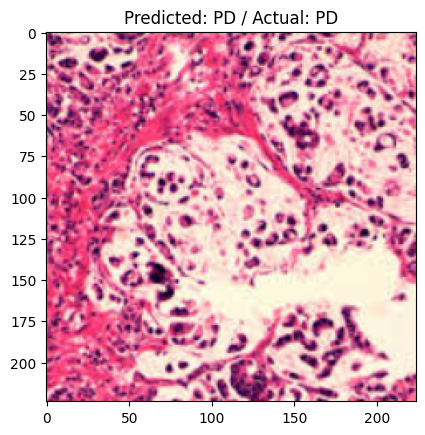

In [19]:
# Choose a random test image
idx = np.random.randint(len(inputs))
imshow(inputs.cpu().data[idx], title=f'Predicted: {class_names[preds[idx]]} / Actual: {class_names[labels[idx]]}')
